In [2]:
#1. Download the employee attrition dataset
#https://www.kaggle.com/datasets/patelprashant/employee-attrition
#2. Perform data preprocessing
#3. Model building using logistic regression and decision tree
#4. Calculate Performance metrics

In [3]:
#For linear algebra
import numpy as np
#For data processing
import pandas as pd
#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("Employee-Attrition.csv")
print(df.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

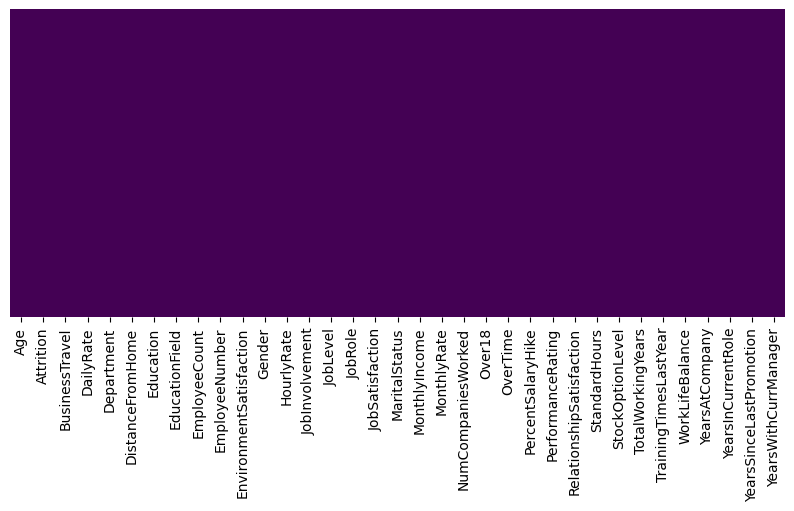

In [6]:
#For checking Missing values
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Attrition', ylabel='count'>

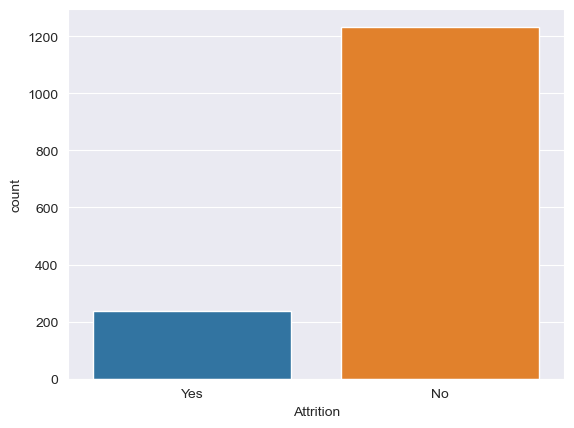

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Attrition', data=df)

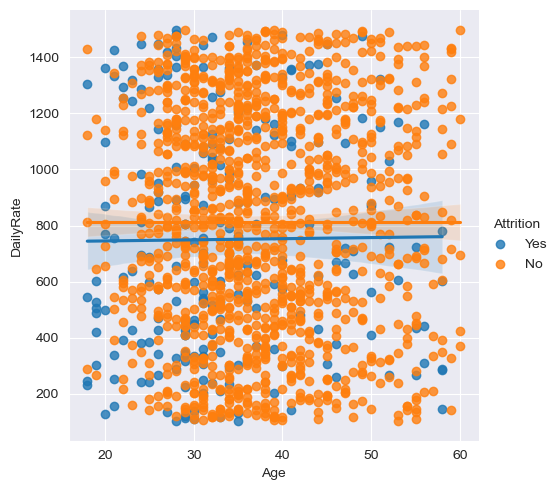

In [8]:
sns.lmplot(x='Age', y='DailyRate', hue='Attrition', data=df)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

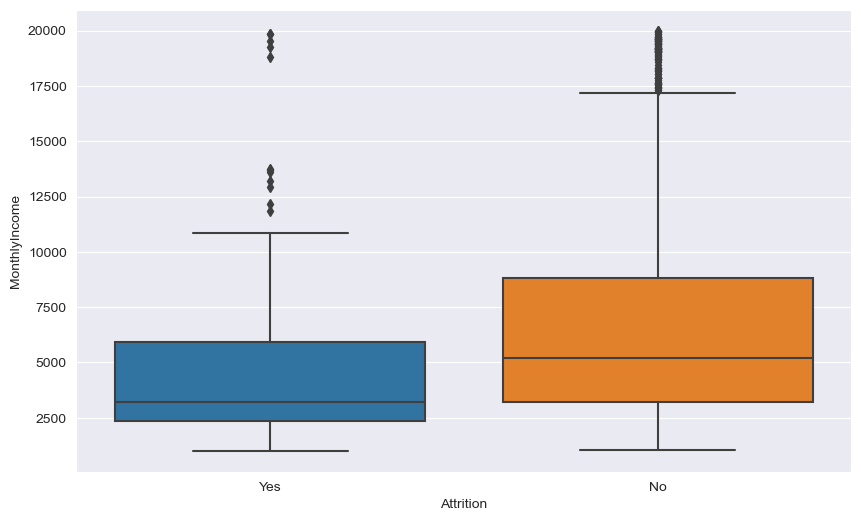

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(y='MonthlyIncome', x='Attrition', data=df)

In [10]:
df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'], axis=1, inplace=True)
print(df.shape)

(1470, 31)


In [11]:
y=df.iloc[:,1]
x=df
x.drop('Attrition', axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [13]:
dum_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
dum_Department = pd.get_dummies(df['Department'], prefix='Department')
dum_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')  # Fixed the typo here
dum_Gender = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)
dum_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
dum_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
dum_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime', drop_first=True)

# Adding these dummy variable to input X
X = pd.concat([x, dum_BusinessTravel, dum_Department, dum_EducationField, dum_Gender, dum_JobRole, dum_MaritalStatus, dum_OverTime], axis = 1)

# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)

print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

The optimal number of neighbors is 7


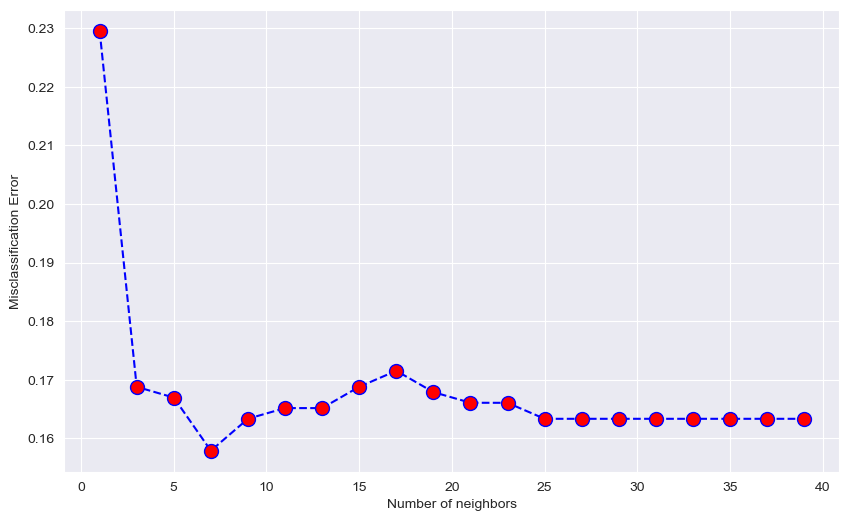

In [15]:
from sklearn.model_selection import cross_val_score

# Perform 10 fold cross-validation
for k in range(1, 40, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Calculate the error rate
error_rate = [1-x for x in cv_scores]

# Determine the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is %d' % optimal_k)

# Plot misclassification error versus k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40, 2), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


In [16]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix 
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("___________________________")
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n 0\n".format(confusion_matrix(y_train, clf.predict(X_train)))) 
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring ='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("__________________________________________________________________________________________________")  
    elif train == False:
        print("Test Result:")
        print("___________________________")
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("__________________________________________________________________________________________________")
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)


Train Result:
___________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       922
           1       0.83      0.19      0.32       180

    accuracy                           0.86      1102
   macro avg       0.85      0.59      0.62      1102
weighted avg       0.86      0.86      0.82      1102


Confusion Matrix: 
 0

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0148
accuracy score: 0.8621

__________________________________________________________________________________________________
Test Result:
___________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       311
           1       0.14      0.04      0.06        57

    accuracy                           0.82       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.74      0.82      0.77       368


Confusion Matri

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
#separate the target variable (Attrition) from features
X=df.drop('Attrition', axis=1)
y=df['Attrition']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define categorical and numerical columns
categorical_columns=['Department', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime']
numerical_columns=['Age', 'DailyRate', 'HourlyRate','MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears']

#Create transformers for preprocessing
categorical_transformer=Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numerical_transformer=Pipeline(steps=[('scaler', StandardScaler())])

#combine transformers using a columnTransforemer
preprocessor=ColumnTransformer(transformers=[('num', numerical_transformer, numerical_columns),('cat', categorical_transformer, categorical_columns)], remainder='passthrough') #include any columns not specified in transformers

#Create pipelines for models
logistic_pipeline=Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(random_state=42))])
tree_pipeline=Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])

In [43]:
from sklearn.preprocessing import OneHotEncoder

#Create a inehot encoder object
encoder=OneHotEncoder(handle_unknown='ignore')

In [44]:
import pandas as pd
from scipy.sparse import csr_matrix

#create a asparse matrix
X=csr_matrix([[1,2], [3,4]])

#convert the sparse matrix to a dense matrix
X_dense=X.todense()

#create a pandas dataframe from the dense matrix
X_df=pd.DataFrame(X_dense)

#print the dataframe
print(X_df)

   0  1
0  1  2
1  3  4


In [45]:
from scipy.sparse import csr_matrix

In [40]:
#convert the sparse matrices to dense matrices
X_train_dense=X_train.any()
X_test_dense=X_test.any()

#creat pandas DataFrames from the dense matrices
X_train_df=pd.DataFrame(X_train_dense)
X_test_df=pd.DataFrame(X_test_dense)

#Now you can use strings to specify columns
#X_train_encoded=encoder.fit_transform(X_train_df)
#X_test_df=pd.DataFrame(X_test_dense)
X_train_encoded = encoder.transform(X_train)
X_test_df = encoder.transform(X_test)

#Fit the models
logistic_pipeline.fit(X_train_encoded, y_train)
tree_pipeline.fit(X_train_encoded, y_train)

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for each categorical column
encoders = {}
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        encoder = LabelEncoder()
        encoder.fit(pd.concat([X_train[column], X_test[column]]))
        encoders[column] = encoder

# Encode categorical variables in both X_train and X_test
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for column, encoder in encoders.items():
    if column in X_train_encoded.columns:
        X_train_encoded[column] = encoder.transform(X_train_encoded[column])
    if column in X_test_encoded.columns:
        X_test_encoded[column] = encoder.transform(X_test_encoded[column])

# Fit the models
logistic_pipeline.fit(X_train_encoded, y_train)
tree_pipeline.fit(X_train_encoded, y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'HourlyRate', 'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'TotalWorkingYears']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department', 'JobRole',
                                                   'MaritalStatus', 'Gender',
                                                   'OverTime'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Encode the categorical features
categorical_features=['Gender', 'Department']
for feature in categorical_features:
    df=pd.get_dummies(df, drop_first=True, columns=[feature])

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'DailyRate', 'Gender', 'Department']], df['Attrition'], test_size=0.25, random_state=42)

KeyError: "['Gender', 'Department'] not in index"